In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('trainingData.csv',usecols=[str(i) for i in range(21)]+['Label'])

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Label
0,96.376917,81.327004,70.641521,75.123300,90.411418,24.578072,38.326737,63.141079,85.229582,19.583417,...,78.703396,39.602618,29.709478,45.999335,64.930261,65.995207,63.511047,62.746168,63.617800,stop
1,102.685715,87.344822,74.952517,78.463663,92.715252,23.659767,40.001474,64.924673,86.902922,18.375030,...,80.979561,40.848428,32.361409,48.020073,67.596660,67.249173,65.205710,65.606139,66.995194,stop
2,105.727209,89.298615,75.297535,77.582244,91.654136,23.878756,38.462781,64.755252,86.680336,19.390836,...,81.284947,39.619076,32.055826,48.776993,66.819977,66.819977,66.124736,66.868419,68.699170,stop
3,105.003974,88.901905,76.349611,79.512360,93.640529,24.136047,40.220537,64.903784,87.476398,18.725490,...,81.108547,39.562803,31.825808,48.694149,67.599494,65.961938,66.205497,67.033582,67.652306,stop
4,108.822652,92.969468,77.386710,79.130020,93.636267,25.182914,40.022471,66.149456,88.853749,18.718163,...,83.191907,40.314692,33.572070,49.896446,68.835470,67.324644,66.701097,67.304837,69.918920,stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,123.965991,89.526507,80.527696,114.375927,152.323419,33.842003,66.783911,47.229382,32.109860,15.826296,...,8.782842,50.609102,58.246563,42.405023,34.419613,82.523274,74.656963,64.572552,64.179401,yes
1996,119.000467,87.155672,82.155003,120.560266,162.821306,31.012542,63.771293,46.933759,30.899479,19.333333,...,11.392005,52.298290,59.296805,43.834284,35.455763,81.650339,71.854792,62.271806,62.089541,yes
1997,125.195122,91.763981,80.785486,117.503635,158.732808,28.769354,64.686125,47.400116,31.125851,18.894684,...,11.135936,52.698690,59.753936,43.550841,33.826723,82.495942,72.814896,62.520545,61.615625,yes
1998,126.129797,90.587563,80.057193,116.642155,158.152614,27.671748,66.368466,47.421734,30.799071,21.835138,...,10.282297,54.904783,61.107726,41.986527,32.116038,82.861111,71.646034,59.922266,59.144391,yes


In [6]:
for i in range(2000):
    if df['Label'][i]=='stop':
        df['Label'][i]=1
    elif df['Label'][i]=='up':
        df['Label'][i]=2
    elif df['Label'][i]=='victory':
        df['Label'][i]=3
    elif df['Label'][i]=='yes':
        df['Label'][i]=4


C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_4524/1533021745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=1
C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_4524/1533021745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=2
C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_4524/1533021745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=3
C:\Users\NIDHIS~1\AppData\Local\Temp/ipyker

In [7]:
y = df['Label']
y = y.astype('int')
X = df.drop('Label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
y_test.shape

(600,)

In [9]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

In [10]:
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       151
           2       0.97      0.99      0.98       138
           3       0.99      0.96      0.98       167
           4       0.99      0.99      0.99       144

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [11]:
predictions

array([3, 1, 3, 3, 3, 1, 2, 1, 3, 1, 4, 3, 1, 3, 3, 3, 3, 3, 1, 2, 4, 1,
       4, 3, 3, 4, 1, 3, 2, 1, 3, 3, 1, 2, 1, 2, 4, 2, 4, 3, 1, 3, 1, 3,
       3, 4, 2, 3, 2, 4, 1, 2, 1, 1, 3, 4, 3, 3, 1, 3, 1, 3, 2, 3, 2, 2,
       4, 4, 1, 4, 4, 4, 3, 1, 4, 4, 3, 4, 3, 1, 3, 3, 4, 4, 3, 2, 1, 3,
       4, 2, 4, 2, 4, 4, 2, 4, 3, 3, 2, 4, 1, 1, 1, 4, 2, 3, 4, 3, 3, 1,
       3, 1, 2, 3, 4, 3, 4, 2, 2, 2, 2, 4, 3, 2, 4, 4, 2, 2, 3, 1, 1, 3,
       1, 2, 3, 3, 3, 3, 1, 1, 2, 4, 1, 2, 3, 4, 3, 3, 4, 3, 3, 2, 2, 3,
       4, 2, 1, 1, 2, 4, 4, 3, 3, 3, 2, 4, 1, 3, 4, 1, 4, 1, 3, 1, 1, 2,
       2, 3, 4, 3, 4, 4, 4, 3, 3, 1, 4, 4, 3, 4, 1, 2, 4, 2, 1, 2, 2, 3,
       4, 1, 2, 1, 4, 3, 1, 2, 4, 1, 2, 3, 4, 4, 1, 4, 2, 1, 4, 4, 4, 1,
       4, 1, 1, 2, 4, 1, 1, 4, 1, 1, 1, 2, 2, 3, 4, 4, 4, 2, 2, 1, 3, 2,
       2, 2, 3, 3, 4, 2, 4, 4, 3, 2, 1, 3, 2, 4, 4, 2, 2, 4, 2, 1, 3, 4,
       2, 2, 2, 3, 4, 2, 3, 3, 4, 4, 4, 3, 4, 1, 2, 2, 1, 1, 1, 3, 3, 4,
       1, 4, 4, 2, 4, 2, 2, 3, 1, 3, 4, 4, 3, 2, 3,

In [12]:
y_test

1458    3
198     1
1276    3
1243    3
1267    3
       ..
246     1
186     1
1614    4
1142    3
1505    4
Name: Label, Length: 600, dtype: int32

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

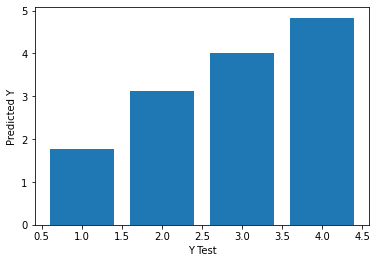

In [14]:
plt.bar(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

C:\Users\Nidhi Singh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Predicted Y')

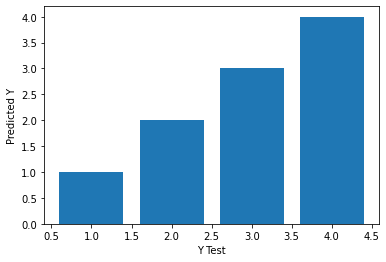

In [16]:
plt.bar(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
import pickle
pickle.dump(rfc, open('firstModel.sav', 'wb'))